## Sesión 09: Análisis de regresión: transformación de variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel('data/b03_enigh2020.xlsx', usecols=['ing_cor', 'gasto_mon'])

In [3]:
df.describe()

,ing_cor,gasto_mon
count,2.332000e+03,2.332000e+03
mean,6.491196e+04,3.340109e+04
std,9.588983e+04,4.010108e+04
min,0.000000e+00,0.000000e+00
25%,2.931809e+04,1.616024e+04
50%,4.643773e+04,2.457074e+04
75%,7.335729e+04,3.821922e+04
max,3.305164e+06,1.007112e+06


In [4]:
X = df['ing_cor']
X = sm.add_constant(X)
y = df['gasto_mon']
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              gasto_mon   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          3.99e-246
Time:                        02:05:44   Log-Likelihood:                -27464.
No. Observations:                2332   AIC:                         5.493e+04
Df Residuals:                    2330   BIC:                         5.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.661e+04    788.287     21.077      0.0

R^2  sns.scatterplot(data=df, x='ingreso_log', y='gasto_log')
coef


<Axes: xlabel='ing_cor', ylabel='gasto_mon'>

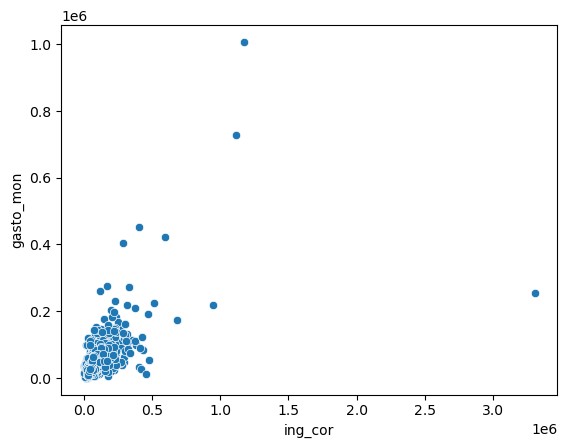

In [12]:
sns.scatterplot(data=df, x='ing_cor', y='gasto_mon')

In [8]:
df = df[(df['ing_cor']>1)&(df['gasto_mon']>1)]

In [9]:
df['ingreso_log'] = np.log(df['ing_cor'])
df['gasto_log'] = np.log(df['gasto_mon'])

<Axes: xlabel='ingreso_log', ylabel='gasto_log'>

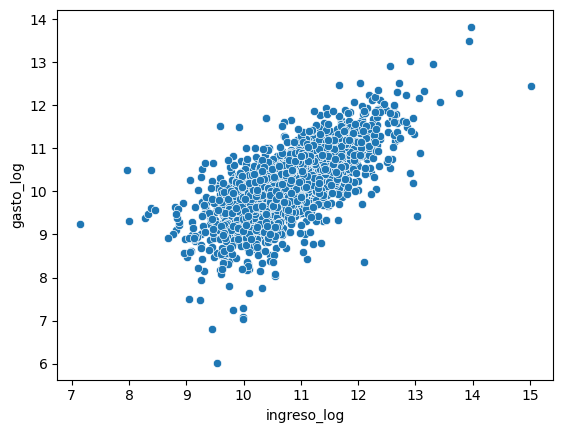

In [11]:
sns.scatterplot(data=df, x='ingreso_log', y='gasto_log')

X = df['ingreso_log']
X = sm.add_constant(X)
y = df['gasto_log']
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
# Imprimir los resultados
print(model.summary())

*Una diferencia entre logaritmos naturales representa un cambio relativo*. El logaritmo natural de "x" representa a qué exponente se debe elevar la base *e* para obtener ese número. Cuando calculas la diferencia entre dos logaritmos naturales se está comparando los exponentes a los cuales se eleva la base e para obtener x1 y x2. Por ejemplo, si y = ln(x2)-ln(x1) entonces x1 es igual a "e elevado a la y" multiplicado por x2, es decir, y representa cuántas vecse más grande o más pequeño es x1 en comparación con x2. 

Cuando, tanto la variable independiente como la variable dependiente son transformadas con logaritmos, los coeficientes de la regresión se interpretan como una *elasticidad*, esto es, como el cambio porcentual en y con un cambio porcentual en x.

## ingreso el 1% aumenta .68 en el gasto